<a href="https://colab.research.google.com/github/Nobu90/scaling-broccoli/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 후기

## 손 맛을 보았다

중간에 통과하기 위해서 이미지도 키워보고 비슷하게 사진도 찍어보고 편법식으로 할까 했었는데 디스코드에 있는 대화를 보고 나도 조금 정석으로 해보자했는데 너무 힘들었다.
그래도 모델링 만으로도 원하는 결과를 얻을 수 있다는 자신감을 얻어서 기쁘다.
여러 파라미터를 생각 없이 이리저리 조정하다가 감으로 힌트를 얻어 에폭을 조정하면서 결국 원하는 결과를 얻었는데, 나중에는 감으로 이것 조정하지 않아도 머리로 예측하고 미리 그릴 수 있었으면 좋겠다.
그러려면 역시 모델에 대한 이해와 각 파라미터의 관계 그리고 내가 훈련시키고자 하는 테스트에 대한 특성 등 여러가지를 알아야할 것 같다.
그동안 아무리 배워도 어느 정도는 운 빨이 아닐까 하는 의심이 있었는데 이번에 그런 믿음이 깨진 것만으로도 충분히 만족스러웠다. 

## Change Parameters


Version 1 - n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch=12 /test_accuracy: 0.38999998569488525

Version 2 - n_channel_1=32
n_channel_2=64
n_dense=16
n_train_epoch=12 /test_accuracy: 0.5733333230018616

Version 3 - n_channel_1=32 n_channel_2=64 n_dense=12 n_train_epoch=12 /test_accuracy: 0.5533333420753479

Version 4 - n_channel_1=32 n_channel_2=64 n_dense=12 n_train_epoch=14 /test_accuracy: 0.3333333333333333

## Change funciton and epoch

Version 5 - model.add(keras.layers.Dense(10, activation='sigmoid')) from softmax to sigmoid
n_channel_1=32
n_channel_2=64
n_dense=12
n_train_epoch=20 /test_accuracy: 0.3633333444595337



## Change Parameters

Version 6 - n_channel_1=32 n_channel_2=64 n_dense=24 n_train_epoch=20 /test_accuracy: 0.40666666626930237

Version 7 - n_channel_1=32 n_channel_2=64 n_dense=24 n_train_epoch=15 /test_accuracy: 0.49666666984558105

Version 8 - n_channel_1=16
n_channel_2=16
n_dense=12
n_train_epoch=15 /test_accuracy: 0.43666623214445233

Version 9 - n_channel_1=16
n_channel_2=16
n_dense=12
n_train_epoch=40 /test_accuracy: 0.48444030666433212


## Increase epoch

Version 10 - n_channel_1=16
n_channel_2=16
n_dense=12
n_train_epoch=60 /test_accuracy: 0.5266666412353516

Version 11 - n_channel_1=16
n_channel_2=16
n_dense=12
n_train_epoch=80 /test_accuracy: 0.5699999928474426

Version 12 - n_channel_1=16
n_channel_2=16
n_dense=12
n_train_epoch=100 /test_accuracy: 0.5666666626930237

## Last Modification and Check

Version 13 - n_channel_1=16 n_channel_2=16 n_dense=10 n_train_epoch=90 /test_accuracy: 0.6600000262260437

Version 14 - n_channel_1=16 n_channel_2=16 n_dense=10 n_train_epoch=90 /test_accuracy: 0.6433333158493042

Version 15 - n_channel_1=16 n_channel_2=16 n_dense=10 n_train_epoch=90 /test_accuracy: 0.653333306312561

# Load Libraries, Train, Test

In [333]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)
print(np.__version__)

from PIL import Image
import glob
import os

2.9.2
1.21.6


# Resize Images

In [334]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [335]:
image_dir_path = "/content/drive/MyDrive/Exploration/data/scissor"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [336]:
image_dir_path = "/content/drive/MyDrive/Exploration/data/rock"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [337]:
image_dir_path = "/content/drive/MyDrive/Exploration/data/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


# Load data

In [338]:
def load_data(img_path, number_of_data=300):  

    img_size=28
    color=3

    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=0  
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=1  
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img   
        labels[idx]=2  
        idx=idx+1

    return imgs, labels

image_dir_path = "/content/drive/MyDrive/Exploration/data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


# Check the image

라벨:  0


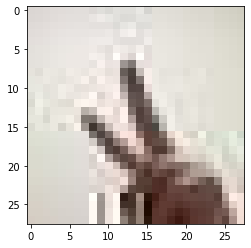

In [339]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# Design Model

In [340]:
n_channel_1=16
n_channel_2=16
n_dense=10
n_train_epoch=90

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='ReLU', input_shape=(28, 28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='ReLU'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='ReLU'))
model.add(keras.layers.Dense(6, activation='sigmoid'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 400)               0         
                                                                 
 dense_40 (Dense)            

# Train Model

In [341]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)

model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print("x_train_reshaped.shape: {}".format(x_train_reshaped.shape))


x_train_reshaped.shape: (300, 28, 28, 3)


In [342]:
history = model.fit(x_train_reshaped, y_train, validation_split=0.20, epochs=n_train_epoch, verbose=1)

Epoch 1/90
8/8 [==============================] - 2s 108ms/step - loss: 1.6965 - accuracy: 0.2792 - val_loss: 1.6374 - val_accuracy: 0.0000e+00
Epoch 2/90
8/8 [==============================] - 0s 52ms/step - loss: 1.2731 - accuracy: 0.4167 - val_loss: 1.7196 - val_accuracy: 0.0000e+00
Epoch 3/90
8/8 [==============================] - 0s 38ms/step - loss: 1.1089 - accuracy: 0.4167 - val_loss: 1.9731 - val_accuracy: 0.0000e+00
Epoch 4/90
8/8 [==============================] - 0s 42ms/step - loss: 1.0419 - accuracy: 0.3875 - val_loss: 2.0756 - val_accuracy: 0.0000e+00
Epoch 5/90
8/8 [==============================] - 0s 43ms/step - loss: 1.0262 - accuracy: 0.4792 - val_loss: 1.9000 - val_accuracy: 0.0000e+00
Epoch 6/90
8/8 [==============================] - 0s 52ms/step - loss: 1.0091 - accuracy: 0.4667 - val_loss: 1.8499 - val_accuracy: 0.0000e+00
Epoch 7/90
8/8 [==============================] - 0s 52ms/step - loss: 0.9942 - accuracy: 0.6250 - val_loss: 1.8060 - val_accuracy: 0.0000e+0

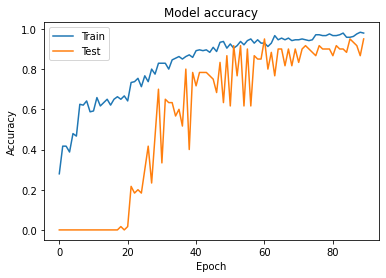

In [343]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

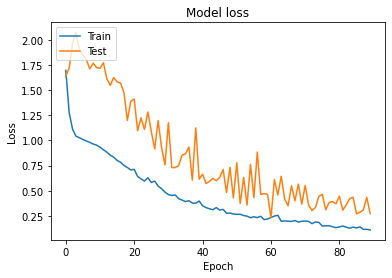

In [344]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Resize Test Images

In [345]:

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/data/rps/paper"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/data/rps/rock"
resize_images(image_dir_path)

image_dir_path = "/content/drive/MyDrive/Colab Notebooks/data/rps/scissor"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [346]:
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/data/rps"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


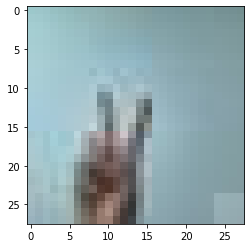

In [347]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [348]:
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

# Result

In [349]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.7365 - accuracy: 0.6533 - 92ms/epoch - 9ms/step
test_loss: 1.736539363861084
test_accuracy: 0.653333306312561
